/home/hasan/.local/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/hasan/.local/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))



Making Brooklyn and Staten Island Outline Maps...
******************* GEOID 36047990100 is in the Brooklyn nycFile but is not in NYU NYC nycFile

Making Brooklyn and Staten Island Outline Maps...
******************* GEOID 36085008900 is in the Staten Island nycFile but is not in NYU NYC nycFile
******************* GEOID 36085990100 is in the Staten Island nycFile but is not in NYU NYC nycFile

Populating new created columns and ploting monthly maps..


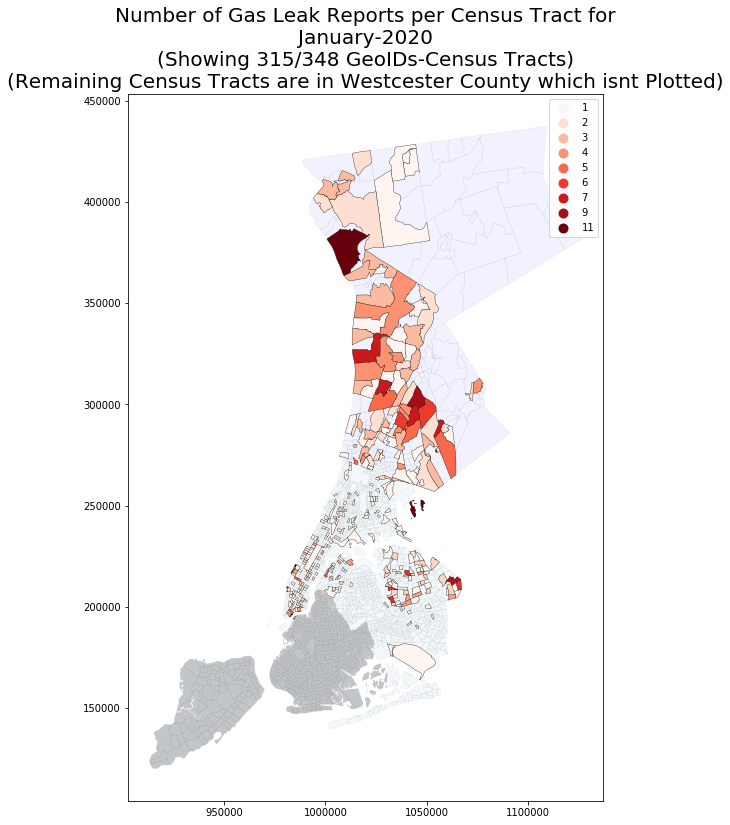

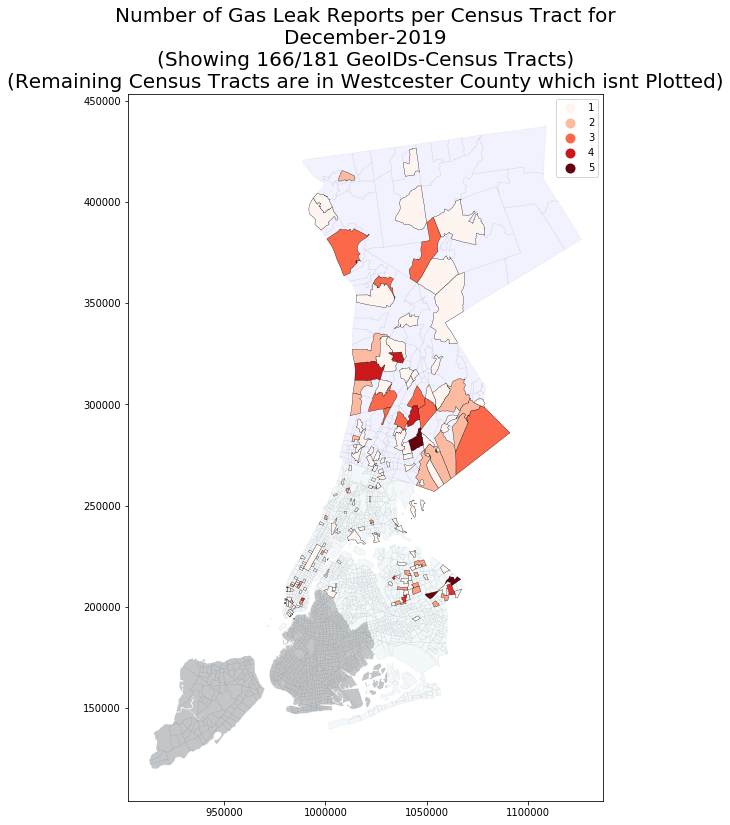

In [1]:
#%%     
# PLOTTING WITH GEOID, WESTCHESTER SHP NOT FOUND YET, NEED TO BLACK OUT BRROKLYN AND STATEN ISLAND
# Plotting the census tracts for all reports that appeared in a specific month                    
# import contextily as ctx
# import matploylib.pyplot as plt
import geopandas as gp
import os
import platform
import pandas as pd
import numpy as np

# A) CREATING DF AND GDF:
nycFile = "NYU_NYC_34505_SP/nyu_2451_34505.shp"
csvFile = "GasHistory_2010_ReportFrequency_Monthly.csv"
brooklynFile = "TIGER_2010_County_Shapefiles/BrooklynCounty_2010SHP/tl_2010_36047_tract10.shp"
statenFile = "TIGER_2010_County_Shapefiles/StatenIslanCounty_2010SHP"
westchesterFile = "westchester2010/wctigtrt10.shp"
monthlyDF = pd.read_csv(csvFile)                                                                            # Read the csv file and make a data frame
nycGDF = gp.read_file(nycFile)                                                                           # Read the shape file and make a data frame
brooklynGDF = gp.read_file(brooklynFile)
statenGDF = gp.read_file(statenFile)
westchesterGDF = gp.read_file(westchesterFile)

# CHANGE THE CRS SO THAT WESTCHESTER AND NYC ARE ON SAME MAP!
nycCRS = nycGDF.crs
westchesterGDF = westchesterGDF.to_crs(nycCRS)

DF_GEOID_COL  = "GEOID_SCT"
GDF_NYC_GEOID_COL = "tractid"
GDF_West_GEOID_COL = "GEOID10"
GDF_NYC_CENSUS_COL = "namelsad"
GDF_West_CENSUS_COL = "NAMELSAD10"
MIN_NUM_TRACTS_NEEDED_TO_PRINT = 150 #max westchester got in a month is 110

# B1) ADDING NEW COLS TO nycGDF westchesterGDF:
nycGDF["MonthYear"] = str                                                                                               # adding two new cols to nycGDF
nycGDF["TotalMonthlyReport" ] = int
nycGDF["CountyName"] = str 
nycGDF["CensusBlockID_list"] = str  
nycGDF["Ticket_list"] = str  
nycGDF["Classification_list"] = str  
nycGDF["Zipcode_list"] = str 
nycGDF["CountyTract"] = str
westchesterGDF["MonthYear"] = str                                                                                       # adding two new cols to westchesterGDF2
westchesterGDF["TotalMonthlyReport" ] = int
westchesterGDF["CountyName"] = str 
westchesterGDF["CensusBlockID_list"] = str  
westchesterGDF["Ticket_list"] = str  
westchesterGDF["Classification_list"] = str  
westchesterGDF["Zipcode_list"] = str 
westchesterGDF["CountyTract"] = str
# B2) CHNAGE DATATYPE OF COLS SO WE CAN COMPARE THEM:
nycGDF[[GDF_NYC_GEOID_COL]] = nycGDF[[GDF_NYC_GEOID_COL]].apply(pd.to_numeric).astype(int)                                      # Turning GDF_NYC_GEOID_COL - the CensusTract number to numpy.int64 values so can query them
westchesterGDF[[GDF_West_GEOID_COL]] = westchesterGDF[[GDF_West_GEOID_COL]].apply(pd.to_numeric).astype(int)                                      # Turning GDF_NYC_GEOID_COL - the CensusTract number to numpy.int64 values so can query them
# nycGDF[['tractid']] = nycGDF[['tractid']].apply(pd.to_numeric).astype(int)  
# nycGDF[['tractnum']] = nycGDF[['tractnum']].apply(pd.to_numeric).astype(int)  
# nycGDF[['name']] = nycGDF[['name']].apply(pd.to_numeric).astype(int) 
# nycGDF[['bcode']] = nycGDF[['bcode']].apply(pd.to_numeric).astype(int) 


# print("======================================================================================================== RAW DATA: GDF and monthly DF ========================================================================================================")
# print(nycGDF)
# print("------------------------------------------------------------------------ monthly DF:------------------------------------------")
# print(monthlyDF)
# print("=============================================================================================================== RAW DATA END =================================================================================================================")

# C) CON EDISON DOESNT INCLUDE DATA FROM STATEN ISLAND AND BROOKYLN SO GRAY THEM OUT
# BROOKLYN OUTLINE GDF:
print("\nMaking Brooklyn and Staten Island Outline Maps...")
bkGeoidList = list()
for row in range(0, len(brooklynGDF)):
    bkGeoidList.append(int(brooklynGDF.iloc[row]["GEOID10"]))
brooklynOutlineGDF = nycGDF.copy()
brooklynOutlineGDF.drop(brooklynOutlineGDF.index, inplace=True)  
skipGeoid = []
for geoid in range(0, len(bkGeoidList)):        
    bkGDF = nycGDF.loc[                                                                               # thisMonthsDF = df that contains all rows for that month-year
        (nycGDF[GDF_NYC_GEOID_COL]  == bkGeoidList[geoid]) 
    ]  
    if len(bkGDF)==0:
        print("******************* GEOID "+str(bkGeoidList[geoid])+" is in the Brooklyn nycFile but is not in NYU NYC nycFile")
    skipGeoid.extend(bkGDF.index.tolist())
    bkGDF = bkGDF.reset_index(drop=True)
    brooklynOutlineGDF = brooklynOutlineGDF.append(bkGDF)
brooklynOutlineGDF.reset_index(drop=True)
# STATEN ISLAND OUTLINE GDF:
print("\nMaking Brooklyn and Staten Island Outline Maps...")
statenGeoidList = list()
for row in range(0, len(statenGDF)):
    statenGeoidList.append(int(statenGDF.iloc[row]["GEOID10"]))
statenOutlineGDF = nycGDF.copy()
statenOutlineGDF.drop(statenOutlineGDF.index, inplace=True)  
skipGeoid = []
for geoid in range(0, len(statenGeoidList)):        
    statenGDF = nycGDF.loc[                                                                               # thisMonthsDF = df that contains all rows for that month-year
        (nycGDF[GDF_NYC_GEOID_COL]  == statenGeoidList[geoid]) 
    ]  
    if len(statenGDF)==0:
        print("******************* GEOID "+str(statenGeoidList[geoid])+" is in the Staten Island nycFile but is not in NYU NYC nycFile")
    skipGeoid.extend(statenGDF.index.tolist())
    statenGDF = statenGDF.reset_index(drop=True)
    statenOutlineGDF = statenOutlineGDF.append(statenGDF)
statenOutlineGDF.reset_index(drop=True)

# D) POPULATE THE NEWLY CREATED COLS:
print("\nPopulating new created columns and ploting monthly maps..")
skipMonthIndex = []
count = 0
thisMonthPlot_nycGDF  = nycGDF.copy()
thisMonthPlot_westGDF = westchesterGDF.copy() 
# 0) GO THROUGH EACH ROW OF THE MONTHLY CSV DATA AND PULL OUT ALL ROWS THAT ARE IN THE SAME MONTH -> FROM EACH MINI MONTH SEPERATED DF, SEPERATE FUTHER BY COUNTY NAME -> USE THE GEOID OF EACH COUNTY TO NAME THE GDF FILE
for row in range(0,len(monthlyDF)):
    thisMonthPlot_nycGDF.drop(thisMonthPlot_nycGDF.index, inplace=True)                           # resetting the month df for this new month
    thisMonthPlot_westGDF.drop(thisMonthPlot_westGDF.index, inplace=True) 
    if row in skipMonthIndex:
        continue

    # 1) SAME MONTH SEPERATION:
    thisMonthsDF = monthlyDF.loc[                                                                               # thisMonthsDF = df that contains all rows for that month-year
        (monthlyDF['MonthYear']  == monthlyDF['MonthYear'][row]) 
    ]  

    if len(thisMonthsDF) <= MIN_NUM_TRACTS_NEEDED_TO_PRINT:                                                                                  # If these r no reports for this month-year so skip
        continue
    skipMonthIndex.extend(thisMonthsDF.index.tolist())
    thisMonthsDF = thisMonthsDF.reset_index(drop=True)
    thisMonthGeoList = thisMonthsDF.GEOID_SCT.tolist()                                                          # need to put census tracts into an array, if i use directly from thisMonthsDF i get errors when there is no 
    thisMonthStr = monthlyDF['MonthYear'][row]

    # 2) SAME COUNTY SEPERATION:
    skipCountyIndex = []
    for row2 in range(0,len(thisMonthsDF)):
        if row2 in skipCountyIndex:
            continue
        thisMonthsCountyDF = thisMonthsDF.loc[                                                                               # thisMonthsCountyDF = df that contains all rows for that month-year
            (thisMonthsDF['CountyName_2010']  == thisMonthsDF['CountyName_2010'][row2]) 
        ]      
        if len(thisMonthsCountyDF) == 0:                                                                                  # If these r no reports for this month-year so skip
            print("----------------- NO BLOCK FOR THIS COUNTY: "+thisMonthsDF['CountyName_2010'][row2])
            continue
        skipCountyIndex.extend(thisMonthsCountyDF.index.tolist())
        thisMonthsCountyDF = thisMonthsCountyDF.reset_index(drop=True)
        thisCountyStr = monthlyDF['CountyName_2010'][row]

        # 3) FROM THE SEPERATED COUNTY MINI DF -> FIND THE GEOID AND POPULATE THE COLS
        skipCountyGeoIdIndex = []
        for row3 in range(0,len(thisMonthsCountyDF)):
            if row3 in skipCountyGeoIdIndex:
                continue
            thisMonthsCountyGeo_nycGDF = nycGDF.loc[                                                                               # thisMonthsCountyDF = df that contains all rows for that month-year
                (nycGDF[GDF_NYC_GEOID_COL]  == thisMonthsCountyDF[DF_GEOID_COL][row3]) 
            ]
            thisMonthsCountyGeo_westGDF = westchesterGDF.loc[                                                                               # thisMonthsCountyDF = df that contains all rows for that month-year
                (westchesterGDF[GDF_West_GEOID_COL]  == thisMonthsCountyDF[DF_GEOID_COL][row3]) 
            ]       
            if (len(thisMonthsCountyGeo_nycGDF) == 0) and (len(thisMonthsCountyGeo_westGDF) == 0):                                                                                  # If these r no reports for this month-year so skip
                print("----------------- NO BLOCK FOR THIS COUNTY: ")#+thisMonthsCountyGeo_nycGDF[GDF_NYC_GEOID_COL][row3])
                continue
            skipCountyGeoIdIndex.extend(thisMonthsCountyGeo_nycGDF.index.tolist())
            skipCountyGeoIdIndex.extend(thisMonthsCountyGeo_westGDF.index.tolist())
            thisMonthsCountyGeo_nycGDF  = thisMonthsCountyGeo_nycGDF.reset_index(drop=True)
            thisMonthsCountyGeo_westGDF = thisMonthsCountyGeo_westGDF.reset_index(drop=True)
            
            # 4) POPULATING THE COLS I ADDED
            #  FROM THE MONTHLY CSV DATA FOR THE SAME GEOIDS
            if len(thisMonthsCountyGeo_nycGDF) != 0:
                thisMonthsCountyGeo_nycGDF.at[0, "MonthYear"] = thisMonthsCountyDF.loc[row3]["MonthYear"]
                thisMonthsCountyGeo_nycGDF.at[0, "TotalMonthlyReport"] = thisMonthsCountyDF.loc[row3]["TotalReports"]
                thisMonthsCountyGeo_nycGDF.at[0, "CountyName"] = thisMonthsCountyDF.loc[row3]["CountyName_2010"]
                thisMonthsCountyGeo_nycGDF.at[0, "CensusBlockID_list"] = thisMonthsCountyDF.loc[row3]["CensusBlockID_list"]
                thisMonthsCountyGeo_nycGDF.at[0, "Ticket_list"] = thisMonthsCountyDF.loc[row3]["Ticket_list"]
                thisMonthsCountyGeo_nycGDF.at[0, "Classification_list"] = thisMonthsCountyDF.loc[row3]["Classification_list"]
                thisMonthsCountyGeo_nycGDF.at[0, "Zipcode_list"] = thisMonthsCountyDF.loc[row3]["Zipcode_list"]
                thisMonthsCountyGeo_nycGDF.at[0, "CountyTract"] = thisMonthsCountyGeo_nycGDF.iloc[0]["CountyName"]+"-"+str(thisMonthsCountyGeo_nycGDF.iloc[0][GDF_NYC_CENSUS_COL]).split(" ")[2]   # Add "CountyName-TractNum" to the col
            if len(thisMonthsCountyGeo_westGDF) != 0:
                thisMonthsCountyGeo_westGDF.at[0, "MonthYear"] = thisMonthsCountyDF.loc[row3]["MonthYear"]
                thisMonthsCountyGeo_westGDF.at[0, "TotalMonthlyReport"] = thisMonthsCountyDF.loc[row3]["TotalReports"]
                thisMonthsCountyGeo_westGDF.at[0, "CountyName"] = thisMonthsCountyDF.loc[row3]["CountyName_2010"]
                thisMonthsCountyGeo_westGDF.at[0, "CensusBlockID_list"] = thisMonthsCountyDF.loc[row3]["CensusBlockID_list"]
                thisMonthsCountyGeo_westGDF.at[0, "Ticket_list"] = thisMonthsCountyDF.loc[row3]["Ticket_list"]
                thisMonthsCountyGeo_westGDF.at[0, "Classification_list"] = thisMonthsCountyDF.loc[row3]["Classification_list"]
                thisMonthsCountyGeo_westGDF.at[0, "Zipcode_list"] = thisMonthsCountyDF.loc[row3]["Zipcode_list"]
                thisMonthsCountyGeo_westGDF.at[0, "CountyTract"] = thisMonthsCountyGeo_westGDF.iloc[0]["CountyName"]+"-"+str(thisMonthsCountyGeo_westGDF.iloc[0][GDF_West_CENSUS_COL]).split(" ")[2]  # Add "CountyName-TractNum" to the col           
            thisMonthPlot_westGDF = thisMonthPlot_westGDF.append(thisMonthsCountyGeo_westGDF)
            thisMonthPlot_nycGDF  = thisMonthPlot_nycGDF.append(thisMonthsCountyGeo_nycGDF)
        thisMonthPlot_westGDF = thisMonthPlot_westGDF.reset_index(drop=True)
        thisMonthPlot_nycGDF = thisMonthPlot_nycGDF.reset_index(drop=True)
    countyTract_NYClist = list()                                                            #
    for i in range(0, len(thisMonthPlot_nycGDF)):
        countyTract_NYClist.append(thisMonthPlot_nycGDF.iloc[i]["CountyTract"])
    countyTract_westlist = list()                                                            #
    for i in range(0, len(thisMonthPlot_westGDF)):
        countyTract_westlist.append(thisMonthPlot_westGDF.iloc[i]["CountyTract"])

    # 5) PLOT THE MONTH'S DATA:
    figx = 14
    figy = 13
    ax = nycGDF.plot(alpha=0.05, edgecolor='black', linewidth = 0.6, figsize = (figx,figy))
    ax = brooklynOutlineGDF.plot(alpha=0.2, ax=ax, figsize = (figx,figy), color="black")
    ax = statenOutlineGDF.plot(alpha=0.2, ax=ax, figsize = (figx,figy), color="black")
    
    ax = thisMonthPlot_nycGDF.plot(column='TotalMonthlyReport',cmap = 'Reds', edgecolor='black', linewidth = 0.3, figsize = (figx,figy),legend = True, ax=ax)#, ax=ax, alpha=1) #10,8
    # map.set_title(label = 'Number of Gas Leak Reports per Census Tract for\n{0}\n(Showing {1}/{2} GeoIDs-Census Tracts)\n(Remaining Census Tracts are in Westcester County which isnt Plotted)'.format(thisMonthStr, len(thisMonthPlot_nycGDF), len(thisMonthsDF)), fontdict={'fontsize': 20}, loc='center')
    
    ax = westchesterGDF.plot(alpha=0.05, edgecolor='black', linewidth = 0.6, figsize = (figx,figy), ax=ax, color="blue")
    map = thisMonthPlot_westGDF.plot(column='TotalMonthlyReport',cmap = 'Reds', edgecolor='black', linewidth = 0.3, figsize = (figx,figy),legend = True, ax=ax)#, ax=ax, alpha=1) #10,8
    map.set_title(label = 'Number of Gas Leak Reports per Census Tract for\n{0}\n(Showing {1}/{2} GeoIDs-Census Tracts)\n(Remaining Census Tracts are in Westcester County which isnt Plotted)'.format(thisMonthStr, len(thisMonthPlot_westGDF)+len(thisMonthPlot_nycGDF), len(thisMonthsDF)), fontdict={'fontsize': 20}, loc='center')

#%%